In [27]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
iris = datasets.load_iris()
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
# Adding Target variable.
data['species'] = pd.Series(iris.target)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
# Rows and columns count in dataset.
data.shape

(150, 5)

The Iris dataset is having measurements of 150 iris flowers of 3 different species.
- The three species in iris dataset:
   1. Setosa (50)     = '0'
   2. Versicolor (50) = '1'
   3. virginica (50)  = '2'
* They are equally distributed.

- The four features of iris dataset are:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
 

In [31]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [32]:
# Checking null values and data types of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [33]:
data.isnull().values.any()

False

In [34]:
data['species'].value_counts()
# Dataset is equally and uniformly distributed.

0    50
1    50
2    50
Name: species, dtype: int64

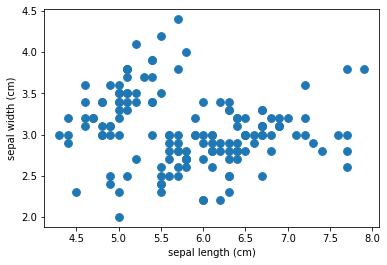

In [35]:
data.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)", s=60) # in most cases sepal width is more if sepal length is less.
plt.show()

* Shorter sepals are wider than longer sepals mostly.

e:\anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


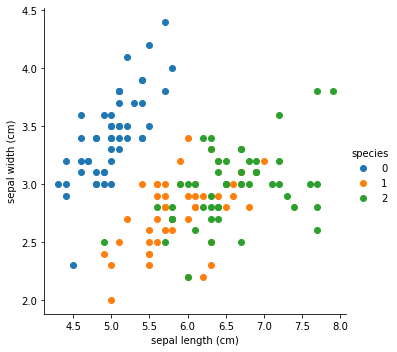

In [36]:
sns.FacetGrid(data, hue="species", size=5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()
plt.show()

* Setosa species sepals are short and wide.
* Versicolor species sepals are having medium height and width. 
* Verginica species sepals looks big compare to others.

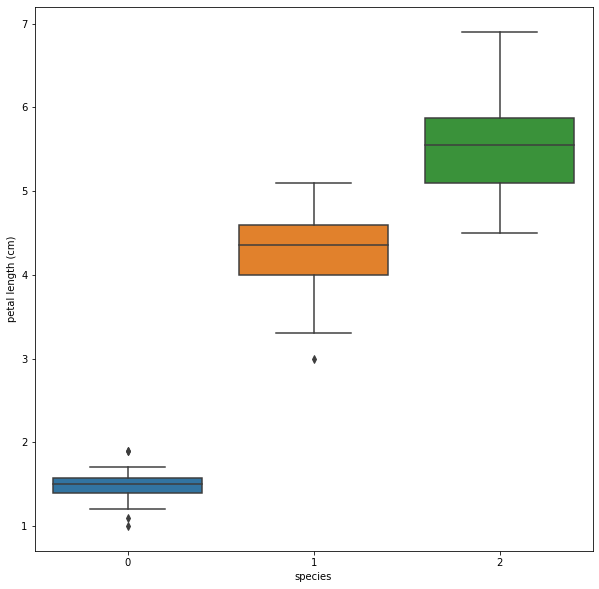

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(x="species", y="petal length (cm)", data=data )
plt.show()

* Setosa species petals are having medium length aroung 1.5
* Versicolor species petals are having petal length around 4.3
* Verginica species petals are having petal length around  5.4

e:\anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


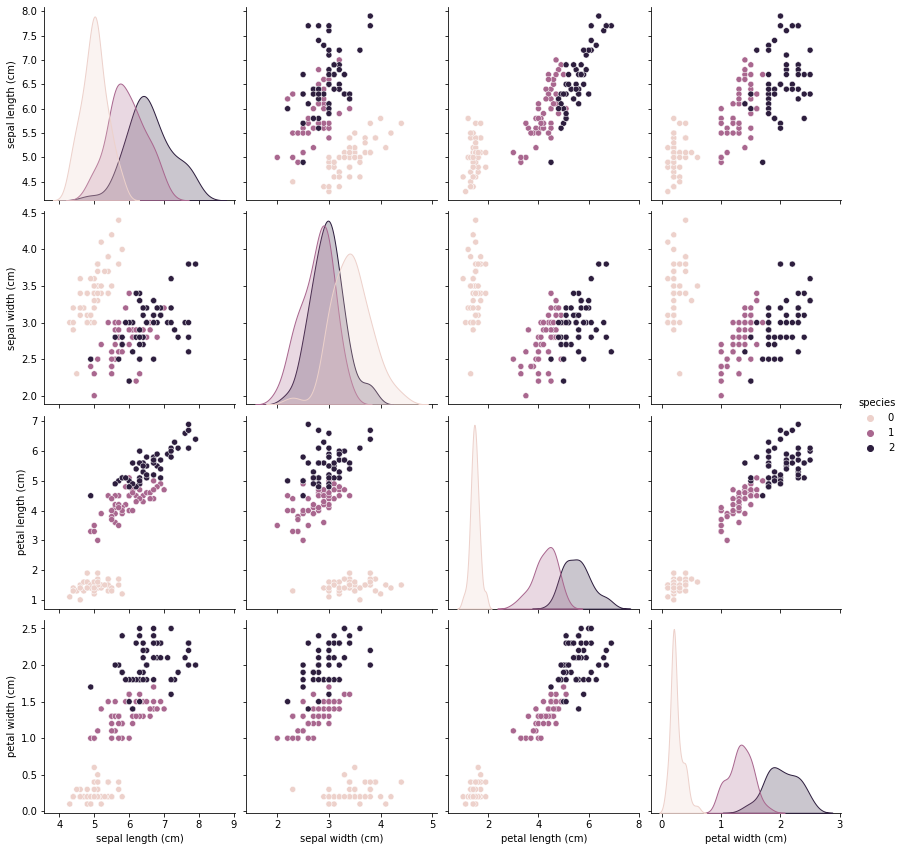

In [38]:
sns.pairplot(data=data, hue="species", size=3)
plt.show()

* Sepal length of species 1 and 2 are looking like distributed in normal distribution.
* Petal length of species 1 and 2 are looking like distributed in normal distribution.
* Sepal legth and petal length of species 1 and 2 are looking positively correlated.
* Sepal width and sepal width of species 0 are correlated.

## Feature Scaling
* Standardization (Z - score normalization)
   - Making data values of each of the feature in the data to have zero - mean and unit variance
* Normalization (Rescaling (min-max normalization))
   - Rescales the features in the range of [0,1]

In [39]:
# Feature scaling using min max normalization.
from sklearn.preprocessing import MinMaxScaler
ndata = data.copy()
min_max_scaler = MinMaxScaler()
ndata.iloc[:, [0,1,2,3]] = min_max_scaler.fit_transform(ndata.iloc[:, [0,1,2,3]])
ndata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


## Train Test Split

In [40]:
# seperating the independent variables from the independent variables
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
x = ndata.iloc[:,:-1]
y = ndata.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y)
X_train.shape

(112, 4)

## Logistic Regression

In [41]:
## Training
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()
logisticReg.fit(X_train,y_train)

LogisticRegression()

In [42]:
# Prediction
predictions = logisticReg.predict(X_test)
score = logisticReg.score(X_test,y_test)
print("Accuracy on test data: ", score*100,"%")

print("Precision :", precision_score(y_test, predictions, average='macro'))
print("Recall :", recall_score(y_test, predictions, average='macro'))
print("F1 Score :", f1_score(y_test, predictions, average='macro'))

Accuracy on test data:  92.10526315789474 %
Precision : 0.9209401709401709
Recall : 0.9209401709401709
F1 Score : 0.9199999999999999


In [43]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 11  2]
 [ 0  1 11]]


In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      0.85      0.88        13
           2       0.85      0.92      0.88        12

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



e:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision Boundary produced by Logistic Regression Model')

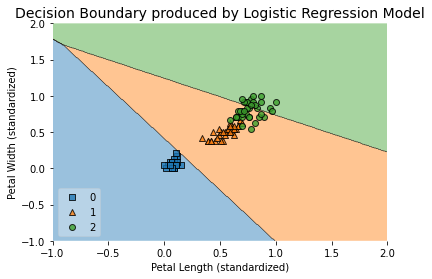

In [45]:
# Decision Boundary
from mlxtend.plotting import plot_decision_regions
value=0
width=1
    
plot_decision_regions(X_train.values, y_train.values, logisticReg, feature_index=[2,3], filler_feature_values={0: value, 1:value},
                      filler_feature_ranges={0: width, 1: width}, legend=3)
plt.ylabel('Petal Width (standardized)')
plt.xlabel('Petal Length (standardized)')
plt.title("Decision Boundary produced by Logistic Regression Model", size = 14)

## Navie Bayes

In [46]:
# Training
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
model = GNBclf.fit(X_train, y_train)

In [47]:
# Prediction
prediction = GNBclf.predict(X_test)
score = GNBclf.score(X_test,y_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



e:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision Boundary produced by Naive-Bayes')

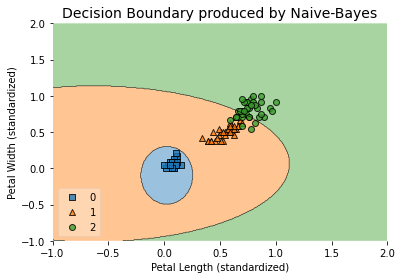

In [48]:
# Decision Boundary
from mlxtend.plotting import plot_decision_regions
value=0
width=1
    
plot_decision_regions(X_train.values, y_train.values, GNBclf, feature_index=[2,3], filler_feature_values={0: value, 1:value},
                      filler_feature_ranges={0: width, 1: width}, legend=3)
plt.ylabel('Petal Width (standardized)')
plt.xlabel('Petal Length (standardized)')
plt.title("Decision Boundary produced by Naive-Bayes", size = 14)

## KNN

In [49]:
#Training
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 4)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=4)

In [50]:
# Prediction
prediction = knn.predict(X_test)
score = knn.score(X_test,y_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



e:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision Boundary produced by KNN')

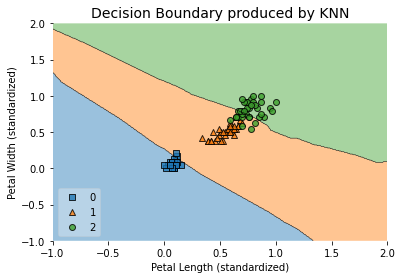

In [51]:
#Decision Boundary
from mlxtend.plotting import plot_decision_regions
value=0
width=1
    
plot_decision_regions(X_train.values, y_train.values, knn, feature_index=[2,3], filler_feature_values={0: value, 1:value},
                      filler_feature_ranges={0: width, 1: width}, legend=3)
plt.ylabel('Petal Width (standardized)')
plt.xlabel('Petal Length (standardized)')
plt.title("Decision Boundary produced by KNN", size = 14)

## SVM

In [52]:
# Training
from sklearn import svm
clfr = svm.SVC()
clfr.fit(X_train,y_train)

SVC()

In [53]:
# Prediction
prediction = knn.predict(X_test)
score = clfr.score(X_test,y_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



e:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision Boundary produced by SVM')

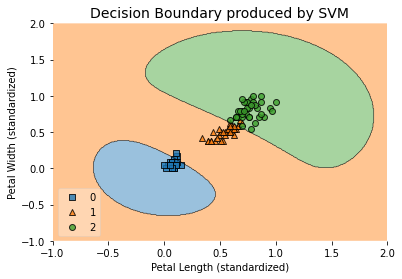

In [54]:
#Decision Boundary
from mlxtend.plotting import plot_decision_regions
value=0
width=1
    
plot_decision_regions(X_train.values, y_train.values, clfr, feature_index=[2,3], filler_feature_values={0: value, 1:value},
                      filler_feature_ranges={0: width, 1: width}, legend=3)
plt.ylabel('Petal Width (standardized)')
plt.xlabel('Petal Length (standardized)')
plt.title("Decision Boundary produced by SVM", size = 14)